# Random Forest Project - Online News Popularity


## Data Processing

### Gather

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load data
df = pd.read_csv('OnlineNewsPopularity.csv')

### Data Assessing

In [3]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,

In [5]:
df.shape

(39644, 61)

In [6]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [8]:
df[df.duplicated()].shape[0]

0

- This dataset has no duplicated row.

In [9]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

### Data Cleaning

In [10]:
df_copy = df.copy()

**Issue: Every column's name have a space at the beginning, except for 'url'.**

**Define: use .rename() function to replace the space," ", with empty, "".**

#### Code

In [11]:
df_copy.rename(columns=lambda x: x.strip().lower().replace(" ", ""), inplace=True)

#### Test

In [12]:
df_copy.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

### Final step of Wrangling: Store data

In [13]:
# store the file
df_copy.reset_index(drop=True)
df_copy.to_csv('clean_data.csv', index=False)

In [14]:
#load data
df2 = pd.read_csv('clean_data.csv')

## Exploratory Data Analysis

In [15]:
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);  # xticks1=range(0, 40000,2000)
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

- Firstly, let's see the Empirical Cumulative Distribution of the dependent variable, shares, so that I will have a sense of the scale and the distribution of the dependant variable.

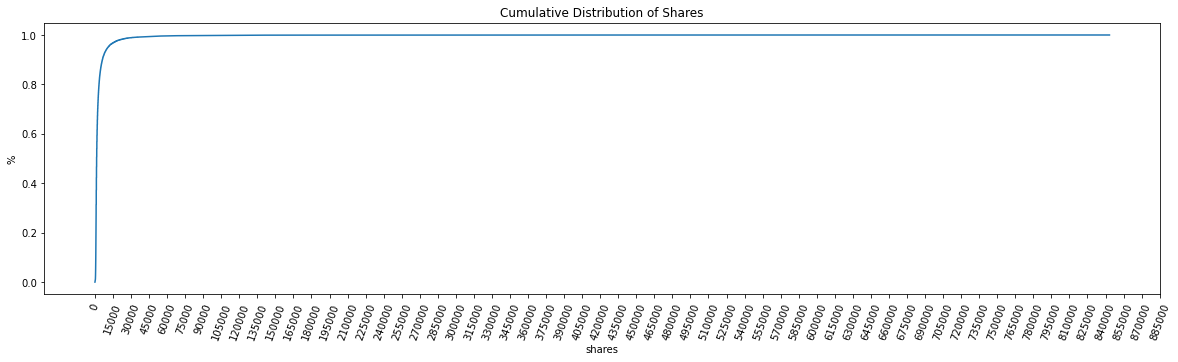

In [16]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x, y = ecdf(df2.shares)

plt.figure(figsize=(20,5))
plt.plot(x, y)
plt.xticks(rotation=70)
desc(title = "Cumulative Distribution of Shares"
     , xlabel='shares'
     , ylabel='%'
    , xticks1 = range(0, 900000, 15000));

- It shows the majority of number of shares are less than 15000. Therefore, I filter out the row with shares higher than 15000 to see the distribution of the majority.

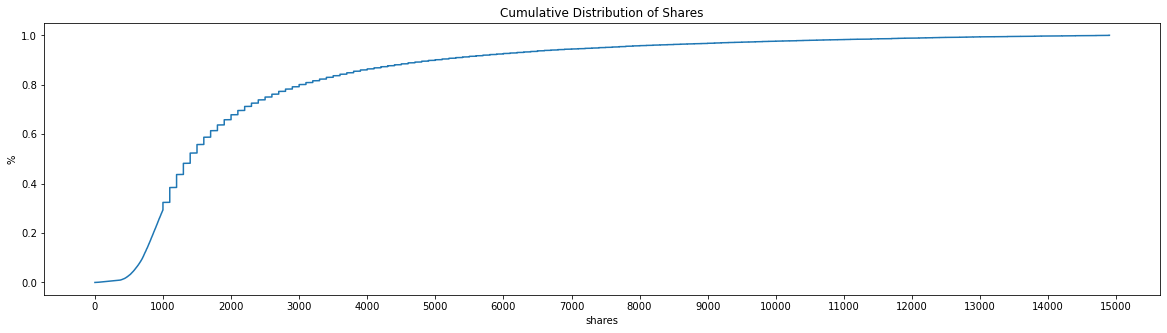

In [17]:
df_majority = df2[df2.shares < 15000] 

# plot out the Cumulative Distribution of the dependant varible, shares.
x, y = ecdf(df_majority.shares)

plt.figure(figsize=(20,5))
plt.plot(x, y)
desc(title = "Cumulative Distribution of Shares"
     , xlabel='shares'
     , ylabel='%'
    , xticks1 = range(0, 16000, 1000));

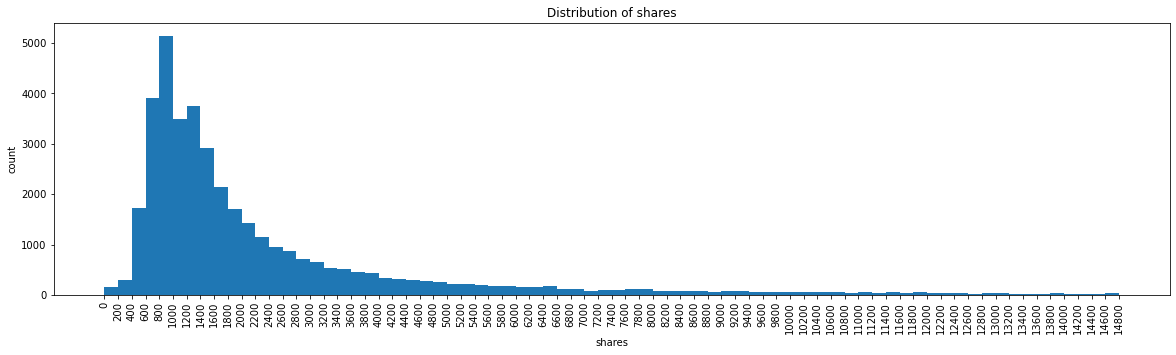

In [18]:
# plot out the Distribution of the dependant varible, shares.
plt.figure(figsize=(20,5))
bin_edges = np.arange(0, df_majority['shares'].max()+1, 200) 
plt.hist(data = df_majority, x = 'shares', bins = bin_edges)
plt.xticks(rotation=90)
desc(title = "Distribution of shares"
     , xlabel='shares'
     , ylabel='count'
    , xticks1 = range(0, 15000, 200));

- We can tell most articles are in the range between 500 and 3000.
- Therefore, I decided to divide the number of shares into 3 levels:
    1. Extremely Bad: If the number of shares is lower than 500.
    2. Majority: If the number of shares is between 500 to 3000.
    3. Extremely Good: If the number of shares is more than 3000. 


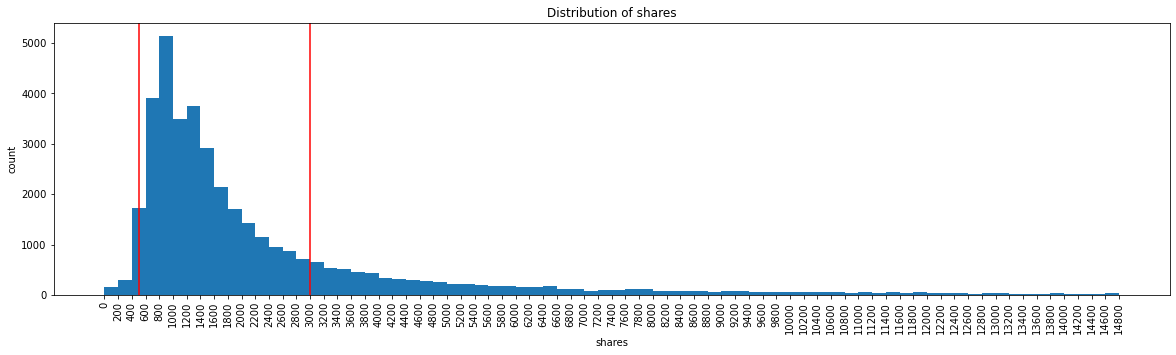

In [19]:
# plot out the Distribution of the dependant varible, shares.
plt.figure(figsize=(20,5))
bin_edges = np.arange(0, df_majority['shares'].max()+1, 200) 
plt.hist(data = df_majority, x = 'shares', bins = bin_edges)
plt.xticks(rotation=90)
desc(title = "Distribution of shares"
     , xlabel='shares'
     , ylabel='count'
    , xticks1 = range(0, 15000, 200))
plt.axvline(500, c ='r')
plt.axvline(3000, c ='r');

In [20]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 500, 3000, 1000000]

# Labels for the 3 levels
bin_names = [0, 1, 2] # Name each popularity level category

# Creates acidity_levels column
df2['shares_levels'] = pd.cut(df2['shares'], bin_edges, labels=bin_names)

In [21]:
# Checks the proportion of each group
df2.groupby('shares_levels').shares.count()/df2.shares.count()

shares_levels
0    0.027469
1    0.747377
2    0.225154
Name: shares, dtype: float64

- Extremely Bad: 3%
- Majority: 75%
- Extremely Good: 26%

## Combine one-hot encoding columns(data_channel-related and weekday-related) into single columns

In [22]:
# print out all the one-hot encoding columns of data_channel
df2.iloc[0, 13:19]

data_channel_is_lifestyle        0
data_channel_is_entertainment    1
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
Name: 0, dtype: object

In [23]:
# print out all the one-hot encoding columns of weekday
df2.iloc[0, 31:39]

weekday_is_monday       1
weekday_is_tuesday      0
weekday_is_wednesday    0
weekday_is_thursday     0
weekday_is_friday       0
weekday_is_saturday     0
weekday_is_sunday       0
is_weekend              0
Name: 0, dtype: object

In [26]:
# Create new columns to store the combined version of each.
df2['weekday'] = None
df2['data_channel'] = None

In [27]:
df2.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [28]:
# Converting them into single columns
# 63 is the location where data_channel is at is the column list.
# 64 is the location where weekday is at is the column list.
for i in range(df2.shape[0]):
    if df2.iloc[i, 13] == 1:
        df2.iloc[i, 63] = "lifestyle"
    elif df2.iloc[i, 14] == 1:
        df2.iloc[i, 63] = "entertainment"
    elif df2.iloc[i, 15] == 1:
        df2.iloc[i, 63] = "bus"
    elif df2.iloc[i, 16] == 1:
        df2.iloc[i, 63] = "socmed"
    elif df2.iloc[i, 17] == 1:
        df2.iloc[i, 63] = "tech "
    elif df2.iloc[i, 18] == 1:
        df2.iloc[i, 63] = "world"
        
    if df2.iloc[i, 31] == 1:
        df2.iloc[i, 62] = "monday"
    elif df2.iloc[i, 32] == 1:
        df2.iloc[i, 62] = "tuesday"
    elif df2.iloc[i, 33] == 1:
        df2.iloc[i, 62] = "wednesday"
    elif df2.iloc[i, 34] == 1:
        df2.iloc[i, 62] = "thursday"
    elif df2.iloc[i, 35] == 1:
        df2.iloc[i, 62] = "friday"
    elif df2.iloc[i, 36] == 1:
        df2.iloc[i, 62] = "saturday"
    elif df2.iloc[i, 37] == 1:
        df2.iloc[i, 62] = "sunday"

In [29]:
# check if the weekday columns converted successfully.
df2.groupby('weekday').url.count()

weekday
friday       5701
monday       6661
saturday     2453
sunday       2737
thursday     7267
tuesday      7390
wednesday    7435
Name: url, dtype: int64

In [30]:
# check if the data_channel columns converted successfully.
df2.groupby('data_channel').url.count()

data_channel
bus              6258
entertainment    7057
lifestyle        2099
socmed           2323
tech             7346
world            8427
Name: url, dtype: int64

In [31]:
# check if there is any null value in these two new columns:
df2[["data_channel", "weekday"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_channel  33510 non-null  object
 1   weekday       39644 non-null  object
dtypes: object(2)
memory usage: 619.6+ KB


In [32]:
# fill out the empty rows with "none"
df2.data_channel = df2.data_channel.fillna("none")

In [33]:
df2.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,lda_00,lda_01,lda_02,lda_03,lda_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_levels,weekday,data_channel
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1,monday,entertainment
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1,monday,bus
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,monday,bus
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1,monday,entertainment
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1,monday,tech


# Random Forest Model Building

### Step 1: Convert the categorical columns into numeric formats.

In [34]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df2.weekday=le.fit_transform(df2.weekday)
df2.data_channel=le.fit_transform(df2.data_channel)

### Step 2: Split the dataset into a training set(70%) and a  test set(30%)

In [35]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df2[['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 
        'data_channel',
#         'data_channel_is_lifestyle',
#        'data_channel_is_entertainment', 'data_channel_is_bus',
#        'data_channel_is_socmed', 'data_channel_is_tech',
#        'data_channel_is_world',
         'weekday',
#        'weekday_is_monday', 'weekday_is_tuesday',
#        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
#        'weekday_is_saturday', 'weekday_is_sunday',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
      'abs_title_sentiment_polarity']]  # Features
y=df2['shares_levels']  # Labels


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

### Step 3: Feature Scaling

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Step 4: Build the model

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier with 100 trees(default)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Step 5: Test the model

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7520598621153523


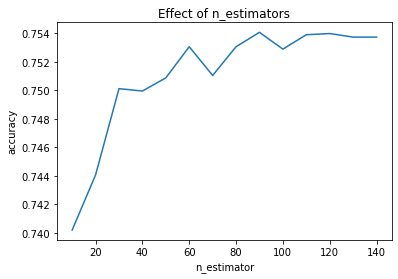

In [39]:
# Try different numbers of n_estimators
estimators = np.arange(10, 150, 10)
accuracy = []

for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy);

It seems like the optimal number of estimators is around 80 and we will get an accuracy of nearly 75%.

# Optimizing the accuracy

### 1. Find out which accuracy is higher, using one hot encoding or not using it?

In [40]:
# Here, we are not using the combined columns, data_channel and weekday. 
# Instead, we use the one-hot encoding version of each feature.
X=df2[['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 
 #       'data_channel', # this is a combined column
        'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world',
#         'weekday', # this is a combined column
       'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
      'abs_title_sentiment_polarity']]  # Features
y=df2['shares_levels']  # Labels


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Create a Random Forest Classifier with 100 trees(default)
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

In [41]:
# calculate the accuracy using one_hot_encoding in different sizes of estimators.
estimators = np.arange(10, 150, 10)
accuracy_one_hot_encoding = []

for n in estimators:
    clf2.set_params(n_estimators=n)
    clf2.fit(X_train, y_train)
    y_pred=clf2.predict(X_test)
    accuracy_one_hot_encoding.append(metrics.accuracy_score(y_test, y_pred))

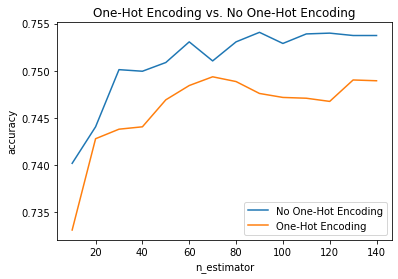

In [42]:
# line 1: Accuracy without using One-Hot Encoding
x1 = estimators
y1 = accuracy
# plotting the line 1 points 
plt.plot(x1, y1, label = "No One-Hot Encoding")
# line 1: Accuracy using One-Hot Encoding
x2 = estimators
y2 = accuracy_one_hot_encoding
# plotting the line 2 points 
plt.plot(x2, y2, label = "One-Hot Encoding")
plt.xlabel('n_estimator')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title of the current axes.
plt.title('One-Hot Encoding vs. No One-Hot Encoding')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

It shows that the one without using one-hot encoding got slightly better result, nearly 1% higher.

### 2. Find out which variable is noise to the dependant variable? Drop them to see if accuracy increases.

In [43]:
feature_imp = pd.Series(clf.feature_importances_, 
index = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 
        'data_channel', 'weekday',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
      'abs_title_sentiment_polarity']).sort_values(ascending=False)
# index 是擺所有variables(features)

feature_imp

kw_avg_avg                      0.046437
kw_max_avg                      0.039853
kw_avg_max                      0.030876
lda_02                          0.030564
lda_03                          0.030139
lda_00                          0.029857
kw_avg_min                      0.029404
lda_04                          0.028663
global_subjectivity             0.028592
average_token_length            0.028320
lda_01                          0.028276
n_non_stop_unique_tokens        0.027969
self_reference_avg_sharess      0.027629
n_unique_tokens                 0.027594
n_tokens_content                0.027054
avg_positive_polarity           0.026952
self_reference_min_shares       0.026916
kw_max_min                      0.026810
global_rate_positive_words      0.025841
global_sentiment_polarity       0.024970
avg_negative_polarity           0.024239
global_rate_negative_words      0.024042
self_reference_max_shares       0.023793
kw_min_avg                      0.023653
num_hrefs       

In [44]:
feature_imp.index

Index(['kw_avg_avg', 'kw_max_avg', 'kw_avg_max', 'lda_02', 'lda_03', 'lda_00',
       'kw_avg_min', 'lda_04', 'global_subjectivity', 'average_token_length',
       'lda_01', 'n_non_stop_unique_tokens', 'self_reference_avg_sharess',
       'n_unique_tokens', 'n_tokens_content', 'avg_positive_polarity',
       'self_reference_min_shares', 'kw_max_min', 'global_rate_positive_words',
       'global_sentiment_polarity', 'avg_negative_polarity',
       'global_rate_negative_words', 'self_reference_max_shares', 'kw_min_avg',
       'num_hrefs', 'rate_negative_words', 'rate_positive_words',
       'n_tokens_title', 'kw_min_max', 'title_sentiment_polarity',
       'max_negative_polarity', 'num_imgs', 'min_negative_polarity',
       'num_self_hrefs', 'title_subjectivity', 'abs_title_sentiment_polarity',
       'min_positive_polarity', 'abs_title_subjectivity', 'data_channel',
       'weekday', 'weekday', 'num_keywords', 'max_positive_polarity',
       'num_videos', 'kw_max_max', 'kw_min_min', 'i

Since "n_non_stop_words" is the least important variable contributing the number of shares. Thus, we drop it to see if the accracy increases.

In [45]:
X=df2[['kw_avg_avg', 'kw_max_avg', 'lda_02', 'lda_01', 'lda_04', 'kw_avg_max',
       'kw_avg_min', 'lda_00', 'lda_03', 'average_token_length',
       'n_non_stop_unique_tokens', 'global_subjectivity', 'kw_max_min',
       'self_reference_min_shares', 'n_unique_tokens',
       'global_rate_positive_words', 'avg_positive_polarity',
       'global_sentiment_polarity', 'n_tokens_content',
       'self_reference_avg_sharess', 'global_rate_negative_words',
       'avg_negative_polarity', 'self_reference_max_shares',
       'rate_negative_words', 'rate_positive_words', 'num_hrefs', 'kw_min_avg',
       'n_tokens_title', 'kw_min_max', 'data_channel',
       'title_sentiment_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'num_self_hrefs', 'num_imgs',
       'title_subjectivity', 'min_positive_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday', 'weekday',
       'max_positive_polarity', 'is_weekend', 'num_keywords', 'num_videos',
       'kw_max_max', 'kw_min_min']]  # Features
y=df2['shares_levels']  # Labels


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Create a Random Forest Classifier with 100 trees(default)
clf3=RandomForestClassifier(n_estimators=100)
clf3.fit(X_train, y_train)
y_pred=clf3.predict(X_test)

In [46]:
# calculate the accuracy using one_hot_encoding in different sizes of estimators.
estimators = np.arange(10, 150, 10)
accuracy_after_removing_noise = []

for n in estimators:
    clf3.set_params(n_estimators=n)
    clf3.fit(X_train, y_train)
    y_pred=clf3.predict(X_test)
    accuracy_after_removing_noise.append(metrics.accuracy_score(y_test, y_pred))

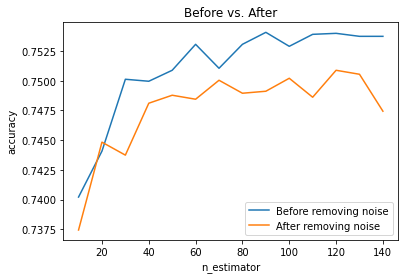

In [47]:
# line 1: Accuracy without using One-Hot Encoding
x1 = estimators
y1 = accuracy
# plotting the line 1 points 
plt.plot(x1, y1, label = "Before removing noise")
# line 1: Accuracy using One-Hot Encoding
x2 = estimators
y2 = accuracy_after_removing_noise
# plotting the line 2 points 
plt.plot(x2, y2, label = "After removing noise")
plt.xlabel('n_estimator')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title of the current axes.
plt.title('Before vs. After')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Weirdly, after removing the noisy variables, it didn't increase the accuracy.

### parameter used is n_estimators

**n_estimators :
This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.**